<a href="https://www.kaggle.com/code/averma111/pytorch-advanced-regression?scriptVersionId=127747238" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [9]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import torch 
import warnings
warnings.filterwarnings('ignore')


In [10]:
house_df = pd.read_csv('/kaggle/input/house-price/1553768847-housing.csv')
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


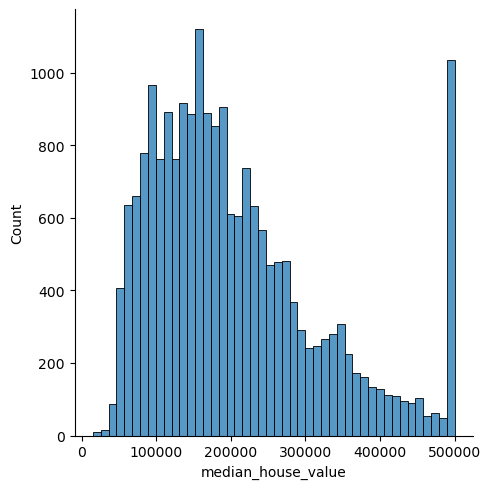

In [11]:
sns.displot(x = house_df['median_house_value'], data=house_df)

In [12]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    return summ

In [13]:
summary('house_dataframe',house_df)

house_dataframe shape: (20640, 10)


,dtypes,null,unique,min,median,max,mean,std
longitude,float64,0,844,-124.35,-118.4900,-114.31,-119.569704,2.003532
latitude,float64,0,862,32.54,34.2600,41.95,35.631861,2.135952
housing_median_age,int64,0,52,1,29.0000,52,28.639486,12.585558
total_rooms,int64,0,5926,2,2127.0000,39320,2635.763081,2181.615252
total_bedrooms,float64,207,1923,1.0,435.0000,6445.0,537.870553,421.385070
population,int64,0,3888,3,1166.0000,35682,1425.476744,1132.462122
households,int64,0,1815,1,409.0000,6082,499.539680,382.329753
median_income,float64,0,12928,0.4999,3.5348,15.0001,3.870671,1.899822
ocean_proximity,object,0,5,<1H OCEAN,NaN,NEAR OCEAN,NaN,NaN
median_house_value,int64,0,3842,14999,179700.0000,500001,206855.816909,115395.615874


In [16]:
# Since there are 207 nulls for total bedroom we need to replace them with mean
house_df.fillna(house_df['total_bedrooms'].mean(),inplace=True)

In [17]:
summary('house_dataframe',house_df)

house_dataframe shape: (20640, 10)


,dtypes,null,unique,min,median,max,mean,std
longitude,float64,0,844,-124.35,-118.4900,-114.31,-119.569704,2.003532
latitude,float64,0,862,32.54,34.2600,41.95,35.631861,2.135952
housing_median_age,int64,0,52,1,29.0000,52,28.639486,12.585558
total_rooms,int64,0,5926,2,2127.0000,39320,2635.763081,2181.615252
total_bedrooms,float64,0,1924,1.0,438.0000,6445.0,537.870553,419.266592
population,int64,0,3888,3,1166.0000,35682,1425.476744,1132.462122
households,int64,0,1815,1,409.0000,6082,499.539680,382.329753
median_income,float64,0,12928,0.4999,3.5348,15.0001,3.870671,1.899822
ocean_proximity,object,0,5,<1H OCEAN,NaN,NEAR OCEAN,NaN,NaN
median_house_value,int64,0,3842,14999,179700.0000,500001,206855.816909,115395.615874


In [6]:
# ocean_proximity is the categorical field in dataset
house_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='Count'>

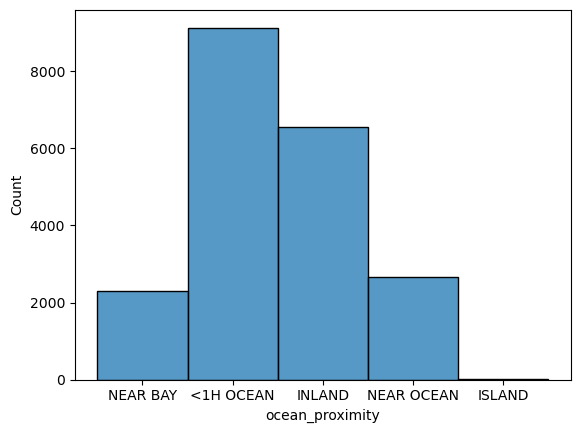

In [18]:
sns.histplot(x=house_df['ocean_proximity'],data=house_df)